In [9]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [19]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp" \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl" \
        --iuxray-preprocessed-train-data-filename "iuxray_preprocessed_train_data__(hash=292,2871459686648763669).pkl" \
        --batch-size 160

script's arguments:
   checkpoint_folder: models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl
   iuxray_preprocessed_train_data_filename: iuxray_preprocessed_train_data__(hash=292,2871459686648763669).pkl
   batch_size: 160
   device: GPU
   num_workers: 0
   eval_iuxray: True
   eval_mimiccxr: True
   use_amp: False

----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=

	#### process 5: running chexpert labeler over 28 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_gt_4.csv --output_path /data/labeler-output_gt_4.csv
Generating LALR tables
	**** process 1 finished, elapsed time = 19.41913414001465
Generating LALR tables
	**** process 2 finished, elapsed time = 21.911477088928223
Generating LALR tables
Generating LALR tables
	**** process 3 finished, elapsed time = 24.2127947807312
Generating LALR tables
	**** process 4 finished, elapsed time = 25.197690963745117
	**** process 5 finished, elapsed time = 25.197816371917725
Cache successfully updated and saved to /home/pamessina/medvqa-workspace/cache/chexpert_labeler_cache.pkl
(*) Chexpert: labeling 154 texts ...
Chexpert labeler: running a maximum of 10 concurrent processes over 3 chunks
chunk: i=0, b=0, e=26, chunk_size=26
chunk: i=1, b=26, e=52, chunk_size=26
chunk: i=2, b=52, e=

	**** process 2 finished, elapsed time = 46.80720591545105
Generating LALR tables
	**** process 3 finished, elapsed time = 48.22532916069031
Generating LALR tables
	**** process 4 finished, elapsed time = 48.77972412109375
Generating LALR tables
	**** process 5 finished, elapsed time = 50.59456205368042
Generating LALR tables
	**** process 6 finished, elapsed time = 52.45517611503601
Generating LALR tables
	**** process 7 finished, elapsed time = 53.022743463516235
Generating LALR tables
Generating LALR tables
	**** process 8 finished, elapsed time = 54.59979701042175
Generating LALR tables
	**** process 9 finished, elapsed time = 55.591774463653564
	**** process 10 finished, elapsed time = 55.59191536903381
Cache successfully updated and saved to /home/pamessina/medvqa-workspace/cache/chexpert_labeler_cache.pkl
Report-level metrics successfully saved to /home/pamessina/medvqa-workspace/results/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model

In [5]:
from medvqa.evaluation.report_generation import get_report_level_metrics_dataframe
from medvqa.utils.files import load_pickle

In [48]:
report_metrics = load_pickle('/home/pamessina/medvqa-workspace/results/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp/mimiccxr_report_level_metrics(template-based).pkl')
report_level_df = get_report_level_metrics_dataframe(report_metrics, 'mimiccxr-template')
report_level_df[report_level_df.columns[:20]]

1it [00:01,  1.09s/it]


,method_name,b1,b2,b3,b4,cD,rg-L,met,mdcmp,wmdcmp,chxlabf1(hard),p(micro),r(micro),f1(micro),p(macro),r(macro),f1(macro),acc,p(NF),p(EC)
0,mimiccxr-template,0.292556,0.16136,0.089559,0.047603,0.040582,0.202194,0.181547,0.086572,0.065924,0.538109,0.507157,0.709254,0.591417,0.414662,0.578434,0.472537,0.762789,0.333333,0.344797


In [25]:
report_metrics = load_pickle('/home/pamessina/medvqa-workspace/results/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp/iuxray_report_level_metrics(template-based).pkl')
report_level_df = get_report_level_metrics_dataframe(report_metrics, 'iuxray-template')
report_level_df[report_level_df.columns[-20:]]

1it [00:00, 12.33it/s]


,r(A),r(Pt),r(PE),r(PO),r(F),r(SD),f1(NF),f1(EC),f1(Card),f1(LL),f1(LO),f1(E),f1(Cons),f1(Pn),f1(A),f1(Pt),f1(PE),f1(PO),f1(F),f1(SD)
0,0.612903,0.5,0.47619,0.428571,0.7,0.375,0.40625,0.204082,0.776119,0.166667,0.628571,0.6875,0.0,0.298507,0.535211,0.363636,0.526316,0.333333,0.424242,0.521739


In [10]:
from importlib import reload
import medvqa

In [13]:
reload(eval_rg_template)
reload(medvqa.evaluation.report_generation)

<module 'medvqa.evaluation.report_generation' from '/home/pamessina/medvqa/medvqa/evaluation/report_generation.py'>

In [12]:
from medvqa import eval_rg_template
from medvqa.evaluation.report_generation import ReportGenExamplePlotter
from medvqa.datasets.iuxray.iuxray_vqa_dataset_management import get_iuxray_image_paths
from medvqa.datasets.mimiccxr.mimiccxr_vqa_dataset_management import get_mimiccxr_image_paths

In [15]:
results = eval_rg_template.evaluate_model(
    checkpoint_folder="models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp",
    mimiccxr_preprocessed_test_data_filename="mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl",
    iuxray_preprocessed_train_data_filename="iuxray_preprocessed_train_data__(hash=292,2871459686648763669).pkl",
    iuxray_qa_adapted_reports_filename="qa_adapted_reports__20220607_170656.json",
    mimiccxr_qa_adapted_reports_filename="qa_adapted_reports__20220607_184201.json",
    batch_size=160,
    return_results=True,
)


----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp/metadata.json

1) device = cuda
checkpoint_names = ['checkpoint_84_cD+wmdcmp+oracc+chxlmicf1+chxlmacf1+qlf1+gacc=0.6339.pt']
2) Loading model from checkpoint ...
checkpoint_path =  /home/pamessina/medvqa-workspace/models/vqa/20220627_111405_mimiccxr+iuxray+chexpert_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(densenet-121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.07,0.2_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp/checkpoint_84_cD+wmdcmp+oracc+chxlmicf1+chxlmacf1+qlf1+gacc=0.6339.pt
3) Creating instance of DensenetVisualModule model ...
DenseNet121's pretrained weights loaded from ImageNet
4) Creating 

In [67]:
iuxray_example_plotter = ReportGenExamplePlotter(
    reports=results['iuxray_reports'],
    report_metrics=results['iuxray_report_metrics'],
    tokenizer=results['tokenizer'],
    qa_adapted_dataset_path=results['iuxray_qa_adapted_reports_path'],
    images_getter=get_iuxray_image_paths,
)

idx: 116

--
gt_report:

cardio mediastinal silhouette , pulmonary vascular pattern are normal.
 mildly low lung volumes.
 no focal infiltrate , pleural effusion or pulmonary edema.
 no pneumothorax.
 no acute cardiopulmonary disease

--
gen_report:

heart size is normal . the mediastinal contour is normal . no focal consolidation . the lungs are free of focal airspace disease . no atelectasis .  . no pleural effusion . no fibrosis . no pneumonia . no pneumothorax is seen . no pulmonary edema . no pulmonary nodules or mass lesions identified . no fracture is seen

--
answered questions:

Cardiomegaly
Enlarged Cardiomediastinum
Consolidation
Lung Opacity
Atelectasis
Support Devices
Pleural Effusion
Pleural Other
Pneumonia
Pneumothorax
Edema
Lung Lesion
Fracture

--
chexpert_labels_gt: [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
chexpert_labels_gen: [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
chexpert_labels_gt (verbose): No Finding
chexpert_labels_gen (verbose): No Finding
bleu-1: 0.32758620689090373
bleu-2: 0.227

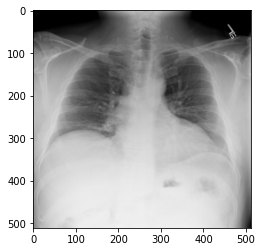

/mnt/workspace/iu-x-ray/dataset/images/CXR3714_IM-1856-2001.png


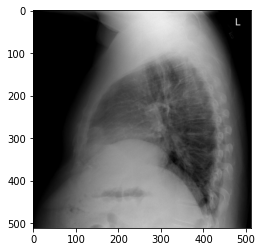

In [73]:
iuxray_example_plotter.inspect_example()

In [87]:
mimiccxr_example_plotter = ReportGenExamplePlotter(
    reports=results['mimiccxr_reports'],
    report_metrics=results['mimiccxr_report_metrics'],
    tokenizer=results['tokenizer'],
    qa_adapted_dataset_path=results['mimiccxr_qa_adapted_reports_path'],
    images_getter=get_mimiccxr_image_paths,
)

idx: 666

--
gt_report:

position of pigtail end catheter in the right lower hemithorax unaltered.
 the same holds for the right-sided pleural effusion and the hydropneumothorax with rather high degree of right lung collapse.
 no significant mediastinal shift is observed.
 unchanged size and position of right-sided hydropneumothorax over the last -hour examination interval

--
gen_report:

heart size is normal . the mediastinal contour is normal . no focal consolidation . the lungs are free of focal airspace disease . appearance suggest atelectasis .  . pleural effusion is seen . no fibrosis . no pneumonia . there is pneumothorax . no pulmonary edema . no pulmonary nodules or mass lesions identified . no fracture is seen

--
answered questions:

Cardiomegaly
Enlarged Cardiomediastinum
Consolidation
Lung Opacity
Atelectasis
Support Devices
Pleural Effusion
Pleural Other
Pneumonia
Pneumothorax
Edema
Lung Lesion
Fracture

--
chexpert_labels_gt: [0 0 0 0 0 0 0 0 1 1 1 0 0 1]
chexpert_label

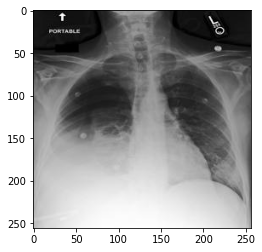

In [97]:
mimiccxr_example_plotter.inspect_example(metrics_to_rank=['chxlabf1'], mode='worst', idx = -300)

In [3]:
!python ../eval_rg_template.py \
        --checkpoint-folder "models/visual_module/20220627_035559_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-color-and-spatial_tags=0_orien=1_chx=1_ql=1_use_amp" \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl" \
        --iuxray-preprocessed-train-data-filename "iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl" \
        --iuxray-qa-adapted-reports-filename "qa_adapted_reports__20220607_170656.json" \
        --mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220607_184201.json" \
        --batch-size 160

script's arguments:
   checkpoint_folder: models/visual_module/20220627_035559_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-color-and-spatial_tags=0_orien=1_chx=1_ql=1_use_amp
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220607_184201.json
   iuxray_qa_adapted_reports_filename: qa_adapted_reports__20220607_170656.json
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl
   iuxray_preprocessed_train_data_filename: iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl
   batch_size: 160
   device: GPU
   num_workers: 0
   eval_iuxray: True
   eval_mimiccxr: True
   use_amp: False

----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/visual_module/20220627_035559_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,

	#### process 3: running chexpert labeler over 44 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_gen_2.csv --output_path /data/labeler-output_gen_2.csv
	#### process 4: running chexpert labeler over 44 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_gen_3.csv --output_path /data/labeler-output_gen_3.csv
	#### process 5: running chexpert labeler over 44 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_gen_4.csv --output_path /data/labeler-output_gen_4.csv
	#### process 6: running chexpert labeler over 44 texts ...
	Command = docker run -v /home/pamessina/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python

In [7]:
report_metrics = load_pickle('/home/pamessina/medvqa-workspace/results/visual_module/20220627_035559_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-color-and-spatial_tags=0_orien=1_chx=1_ql=1_use_amp/iuxray_report_level_metrics(template-based).pkl')
report_level_df = get_report_level_metrics_dataframe(report_metrics, 'iuxray-template')
report_level_df[report_level_df.columns[:20]]

1it [00:00, 12.08it/s]


,method_name,b1,b2,b3,b4,cD,rg-L,met,mdcmp,wmdcmp,chxlabf1(hard),p(micro),r(micro),f1(micro),p(macro),r(macro),f1(macro),acc,p(NF),p(EC)
0,iuxray-template,0.318443,0.198323,0.12422,0.077012,0.052021,0.270814,0.290937,0.134522,0.110691,0.334957,0.372881,0.485294,0.421725,0.359113,0.469553,0.3763,0.829887,0.234043,0.066667


In [8]:
report_metrics = load_pickle('/home/pamessina/medvqa-workspace/results/visual_module/20220627_035559_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-color-and-spatial_tags=0_orien=1_chx=1_ql=1_use_amp/mimiccxr_report_level_metrics(template-based).pkl')
report_level_df = get_report_level_metrics_dataframe(report_metrics, 'mimiccxr-template')
report_level_df[report_level_df.columns[:20]]

1it [00:01,  1.17s/it]


,method_name,b1,b2,b3,b4,cD,rg-L,met,mdcmp,wmdcmp,chxlabf1(hard),p(micro),r(micro),f1(micro),p(macro),r(macro),f1(macro),acc,p(NF),p(EC)
0,mimiccxr-template,0.292506,0.162358,0.090684,0.048331,0.041345,0.202745,0.181152,0.087555,0.0668,0.5263,0.499248,0.689896,0.57929,0.413644,0.586077,0.469231,0.75744,0.377483,0.33877
